In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()) 
data_path = "./data/"

#### 1. 신혼이혼보다 황혼이혼이 더 많은 추세가 지속되고 있다. 서울시의 이혼현황을 데이터분석을 통해 알아보려 한다. 'divorce.csv'파일을 사용하여 아래의 과정에 따라 분석하시오. 
#### A. 혼인지속기간 20년 이상의 이혼을 ‘황혼이혼’이라고 정의하자. 황혼이혼 건수의 변화를 확인하기 위한 bar plot을 그리고 그래프로부터 알게 된 점을 서술하시오.

In [7]:
divorce = pd.read_csv(data_path + "divorce.csv")

In [8]:
divorce.head()

,기간,계,y0_4,y5_9,y10_14,y15_19,y20
0,2000,25477,7394,5295,4425,3969,4376
1,2001,28962,8078,6325,4997,4396,5150
2,2002,29351,7737,6478,5328,4351,5456
3,2003,32499,7747,7097,5885,4824,6945
4,2004,26994,6726,5799,4723,3914,5832


In [9]:
divorce.set_index('기간', inplace=True)

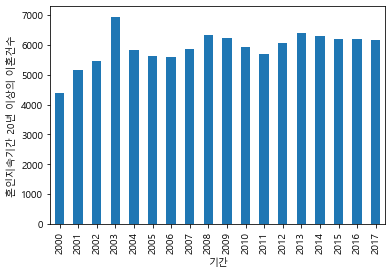

In [6]:
divorce.y20.plot.bar()
plt.ylabel('혼인지속기간 20년 이상의 이혼건수')
plt.show()

#### B. 시간의 흐름에 따른 혼인지속기간별 이혼건수를 누적막대그래프를 사용해 그리시오. 시간이 흐름에 따라 혼인 지속기간별 이혼건수는 어떤 패턴을 보이는가?

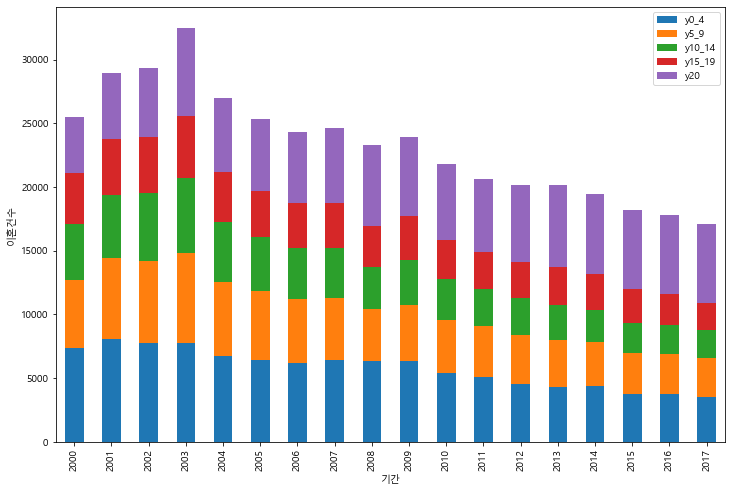

In [13]:
divorce[['y0_4','y5_9','y10_14','y15_19','y20']].plot.bar(stacked=True,figsize=(12,8))
plt.ylabel('이혼건수')
plt.show()

#### C. 앞의 누적막대그래프는 황혼이혼의 증가 추세를 보이기에는 적절치 않다. 그 이유는 무엇인가? 황혼이혼의 증가 추세를 보이기 위해 매년 총 이혼건수 대비 혼인 지속기간 별 이혼건수의 비율을 계산하고 누적막대그래프를 통해 시각화 하시오. 

In [8]:
divorce2=divorce.divide(divorce['계'],axis=0).iloc[:,1:]

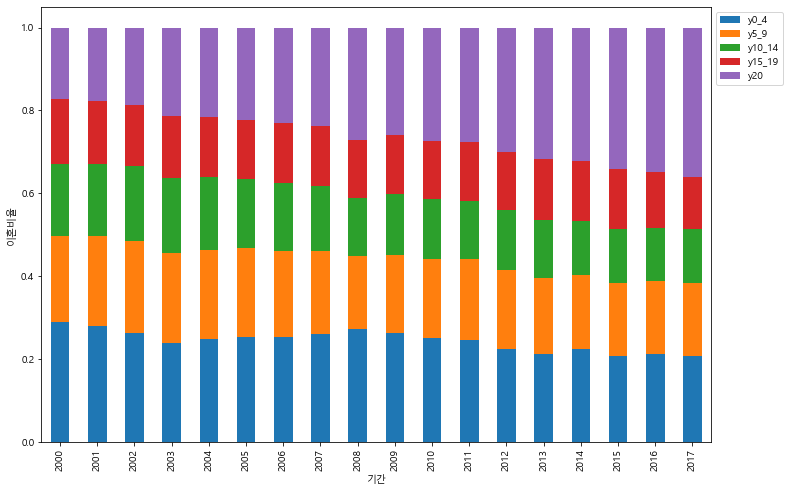

In [9]:
divorce2.plot.bar(stacked=True,figsize=(12,8))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel('이혼비율')
plt.show()

#### 2. 아래의 코드를 따라 2020년 부터의 KOSPI 지수를 다운받고 분석하시오. 

In [14]:
import FinanceDataReader as fdr
kospi = fdr.DataReader('KS11', '2020')

In [12]:
kospi

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,2175.17,2201.21,2202.32,2171.84,4.946800e+08,-0.0102
2020-01-03,2176.46,2192.58,2203.38,2165.39,6.315600e+08,0.0006
2020-01-06,2155.07,2154.97,2164.42,2149.95,5.926700e+08,-0.0098
2020-01-07,2175.54,2166.60,2181.62,2164.27,5.682400e+08,0.0095
2020-01-08,2151.31,2156.27,2162.32,2137.72,9.138300e+08,-0.0111
...,...,...,...,...,...,...
2021-06-09,3216.18,3245.08,3246.49,3216.18,1.960000e+09,-0.0097
2021-06-10,3224.64,3216.94,3235.39,3210.31,1.900000e+09,0.0026
2021-06-11,3249.32,3226.98,3251.58,3226.98,1.650000e+09,0.0077


#### A. KOSPI 지수의 일별 종가(Close)와 변화율(Change)를 선 그래프로 나타내시오. 급격한 변화가 있었던 시점을 특정하고 그 원인을 파악하시오.

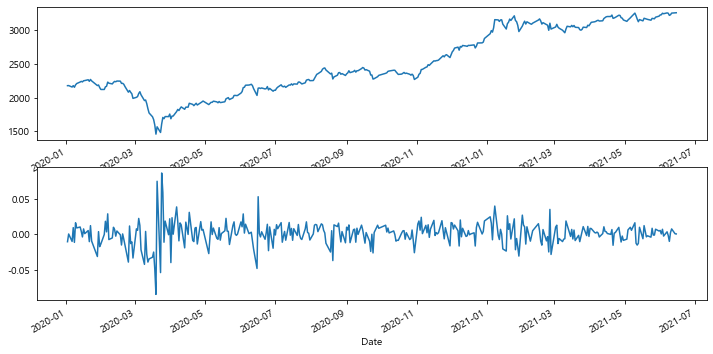

In [13]:
fig, axes = plt.subplots(2,1, figsize=(12,6))
kospi['Close'].plot(ax=axes[0])
kospi['Change'].plot(ax=axes[1])
plt.show()

#### B. KOSPI 지수 종가를 차분하여 추세를 제거한 그래프를 그리고 위의 변화율 그래프와 비교하시오. 

In [34]:
kospi['diff1']=kospi.Close.diff()
kospi.head()

,Close,Open,High,Low,Volume,Change,diff1
Date,,,,,,,
2020-01-02,2175.17,2201.21,2202.32,2171.84,494680000.0,-0.0102,NaN
2020-01-03,2176.46,2192.58,2203.38,2165.39,631560000.0,0.0006,1.29
2020-01-06,2155.07,2154.97,2164.42,2149.95,592670000.0,-0.0098,-21.39
2020-01-07,2175.54,2166.60,2181.62,2164.27,568240000.0,0.0095,20.47
2020-01-08,2151.31,2156.27,2162.32,2137.72,913830000.0,-0.0111,-24.23


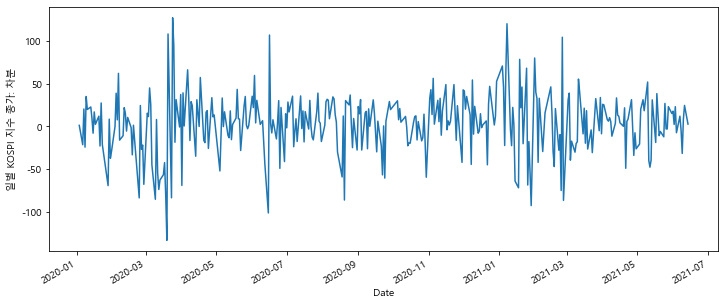

In [35]:
kospi.diff1.plot(figsize=(12,5))
plt.ylabel('일별 KOSPI 지수 종가: 차분')
plt.show()

#### C. 비트코인 (BTC/USD)의 2017년도 이후 가격을 추출하여 일별 종가의 그래프를 그리시오. 

In [36]:
btc = fdr.DataReader('BTC/USD', '2017')

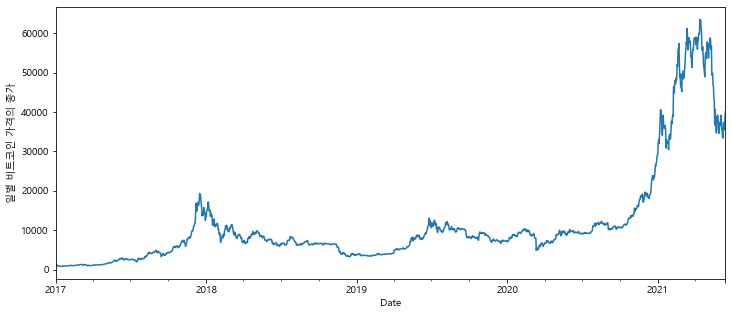

In [37]:
btc.Close.plot(figsize=(12,5))
plt.ylabel('일별 비트코인 가격의 종가')
plt.show()